# Прогнозирование сахарного диабета с помощью 3-ех моделей машинного обучения

**Описание данных:**

- Данные находятся в файле `/Users/artemvishanov/Desktop/диабет/archive/diabetes_data.csv`


**`Features:`**

    1. Age - Возрастная категория 13-го уровня (_AGEG5YR см. кодовую книгу)  
        1 = 18-24
        2 = 25-29
        3 = 30-34
        4 = 35-39
        5 = 40-44
        6 = 45-49
        7 = 50-54
        8 = 55-59
        9 = 60-64
        10 = 65-69
        11 = 70-74
        12 = 75-79
        13 = 80 или старше
        
    2. Sex - пол (1: м; 0: ж)
    
    3. HighChol - 0 = отсутствие высокого уровня холестерина; 1 = высокий уровень холестера
    
    4. CholCheck - 0 = нет проверки холестерина через 5 лет; 1 = да проверка холестерина через 5 лет
    
    5. BMI - Индекс массы тела
    
    6. Smoker - курящий
    
    7. HeartDiseaseorAttack - ишемическая болезнь сердца (ИБС) или инфаркт миокарда (МИ) 0 = нет 1 = да
    
    8. Phys Activity - физическая активность за последние 30 дней - не включая работу 0 = нет 1 = да
    
    9. Fruits - потребляйте фрукты 1 или более раз в день 0 = нет 1 = да
    
    10. Veggies - потребляйте овощи 1 или более раз в день 0 = нет 1 = да
    
    11. HvyAlcoholConsump - (взрослые мужчины >=14 напитков(алкоголя) в неделю и взрослые женщины>=7 напитков в неделю) 0 = нет 1 = да
    
    12. GenHlth - вы бы сказали, что в целом ваше здоровье: масштаб 1-5 1 = отлично 2 = очень хорошо 3 = хорошо 4 = справедливо 5 = плохо
    
    13. MentHlth - дни шкалы плохого психического здоровья 1-30 дней
    
    14. PhysHlth - дни физической болезни или травмы за последние 30 дней по шкале 1-30
    
    15. DiffWalk - у вас серьезные трудности с ходьбой или подъемом по лестнице? 0 = нет 1 = да
    
    16. Stroke - у вас когда-нибудь был инсульт. 0 = нет, 1 = да
    
    17. HighBP -  0 = нет максимума BP, 1 = высокий BP

**`Target:`**

    18. Dibetes - 0 = без диабета, 1 = диабет

## 1. Загрузка данных

**1.1. Импортируем все необходимые библиотеки:**

In [2]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.utils import shuffle
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve, balanced_accuracy_score 

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
print('Импортирование сделано👍')

Импортирование сделано👍


**1.2. Загружаем данные из файла в переменную `df`**

In [4]:
try:
    df = pd.read_csv('/Users/artemvishanov/Desktop/диабет/archive/diabetes_data.csv')
    df_test = pd.read_csv('/Users/artemvishanov/Desktop/диабет/archive/diabetes_data.csv')
except:
    print('Пожалуйста, проверьте путь файла!🥴')

In [5]:
# информация о датафрейме
print(df.info())
# визуализируем датафрейм
df[:5]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1. Вывод:

- Библиотеки импортированны
- Данные загружены

## 2. Предобработка данных

1. Пропущенные значения: нужно решить, что делать с пропущенными значениями в данных, заполнять ли их, удалить ли строки или столбцы, содержащие пропущенные значения.
2. Нормализация данных: некоторые модели машинного обучения требуют, чтобы данные были нормализованы. Нормализация может включать в себя приведение значений к диапазону [0,1] или стандартизацию данных.
3. Кодирование категориальных признаков: многие модели машинного обучения не могут обрабатывать категориальные признаки в их исходной форме. Поэтому нужно закодировать их, например, методом OHE (One-Hot Encoding).
4. Обработка выбросов: выбросы могут повлиять на качество обучения модели. Поэтому нужно обработать выбросы, например, методом IQR.
5. Удаление дубликатов: дубликаты в данных могут привести к неверным результатам. Поэтому нужно проверить наличие дубликатов и удалить их, если они есть.

### 2.1. Пропущенные значения

In [6]:
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

- Пропусков нет

### 2.2. Нормализация данных

In [7]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_test.drop(['Diabetes'], axis=1))

In [8]:
X_scaled[:5]

array([[0.25      , 1.        , 0.        , 1.        , 0.1627907 ,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.5       , 0.16666667, 1.        , 0.        ,
        0.        , 1.        ],
       [0.91666667, 1.        , 1.        , 1.        , 0.1627907 ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.5       , 0.        , 0.        , 0.        ,
        1.        , 1.        ],
       [1.        , 1.        , 0.        , 1.        , 0.1627907 ,
        0.        , 0.        , 1.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 0.33333333, 0.        ,
        0.        , 0.        ],
       [0.83333333, 1.        , 1.        , 1.        , 0.18604651,
        1.        , 0.        , 1.        , 1.        , 1.        ,
        0.        , 0.5       , 0.        , 0.1       , 0.        ,
        0.        , 1.        ],
       [0.58333333, 0.        , 0.        , 1.      

### 2.3.Кодирование категориальных признаков

 - Кодирование не требуется, так как у нас все признаки количественные

### 2.4. Обработка выбросов

In [9]:
# определим межквартильный размах (IQR) для каждой колонки:
Q1 = df_test.quantile(0.25)
Q3 = df_test.quantile(0.75)
IQR = Q3 - Q1

# определим границы выбросов:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# отфильтруем значения, которые находятся за пределами границ выбросов:
outliers = ((df_test < lower_bound) | (df_test > upper_bound)).any(axis=1)
outliers_data = df_test[outliers]

f'{outliers_data.shape[0]} - выбросов'

'37514 - выбросов'

### 2.5. Удаление дубликатов

In [10]:
#f'{df.duplicated().sum()} дубликата'

- 6672 дубликата, для того чтобы данные бали при обучении точные, удали все дубликаты

In [11]:
# удаление дубликатов
#df = df.drop_duplicates()

In [12]:
# также удалим столбцы, которые не сыграют никакой роли в анализе
df = df.drop(['CholCheck', 'HeartDiseaseorAttack', 'GenHlth', 'MentHlth', 'DiffWalk'], axis=1)

## 2. Вывод:

- Пропущенных значений нет
- Кодирование не потребовалось
- Дубликаты удалены
- Удалины столбцы не несущие никакой информации

## 3. Исследовательский анализ данных

In [13]:
f'Размер датафрейма: {df.shape}'

'Размер датафрейма: (70692, 13)'

In [14]:
df[:5]

,Age,Sex,HighChol,BMI,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,PhysHlth,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,26.0,0.0,1.0,0.0,1.0,0.0,30.0,0.0,1.0,0.0
1,12.0,1.0,1.0,26.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,26.0,0.0,1.0,1.0,1.0,0.0,10.0,0.0,0.0,0.0
3,11.0,1.0,1.0,28.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0
4,8.0,0.0,0.0,29.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


### 3.1. Проверка уникальных значений

In [15]:
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Age,13
Sex,2
HighChol,2
BMI,80
Smoker,2
PhysActivity,2
Fruits,2
Veggies,2
HvyAlcoholConsump,2
PhysHlth,31


### 3.2. Проверка частоты всех значений в столбце

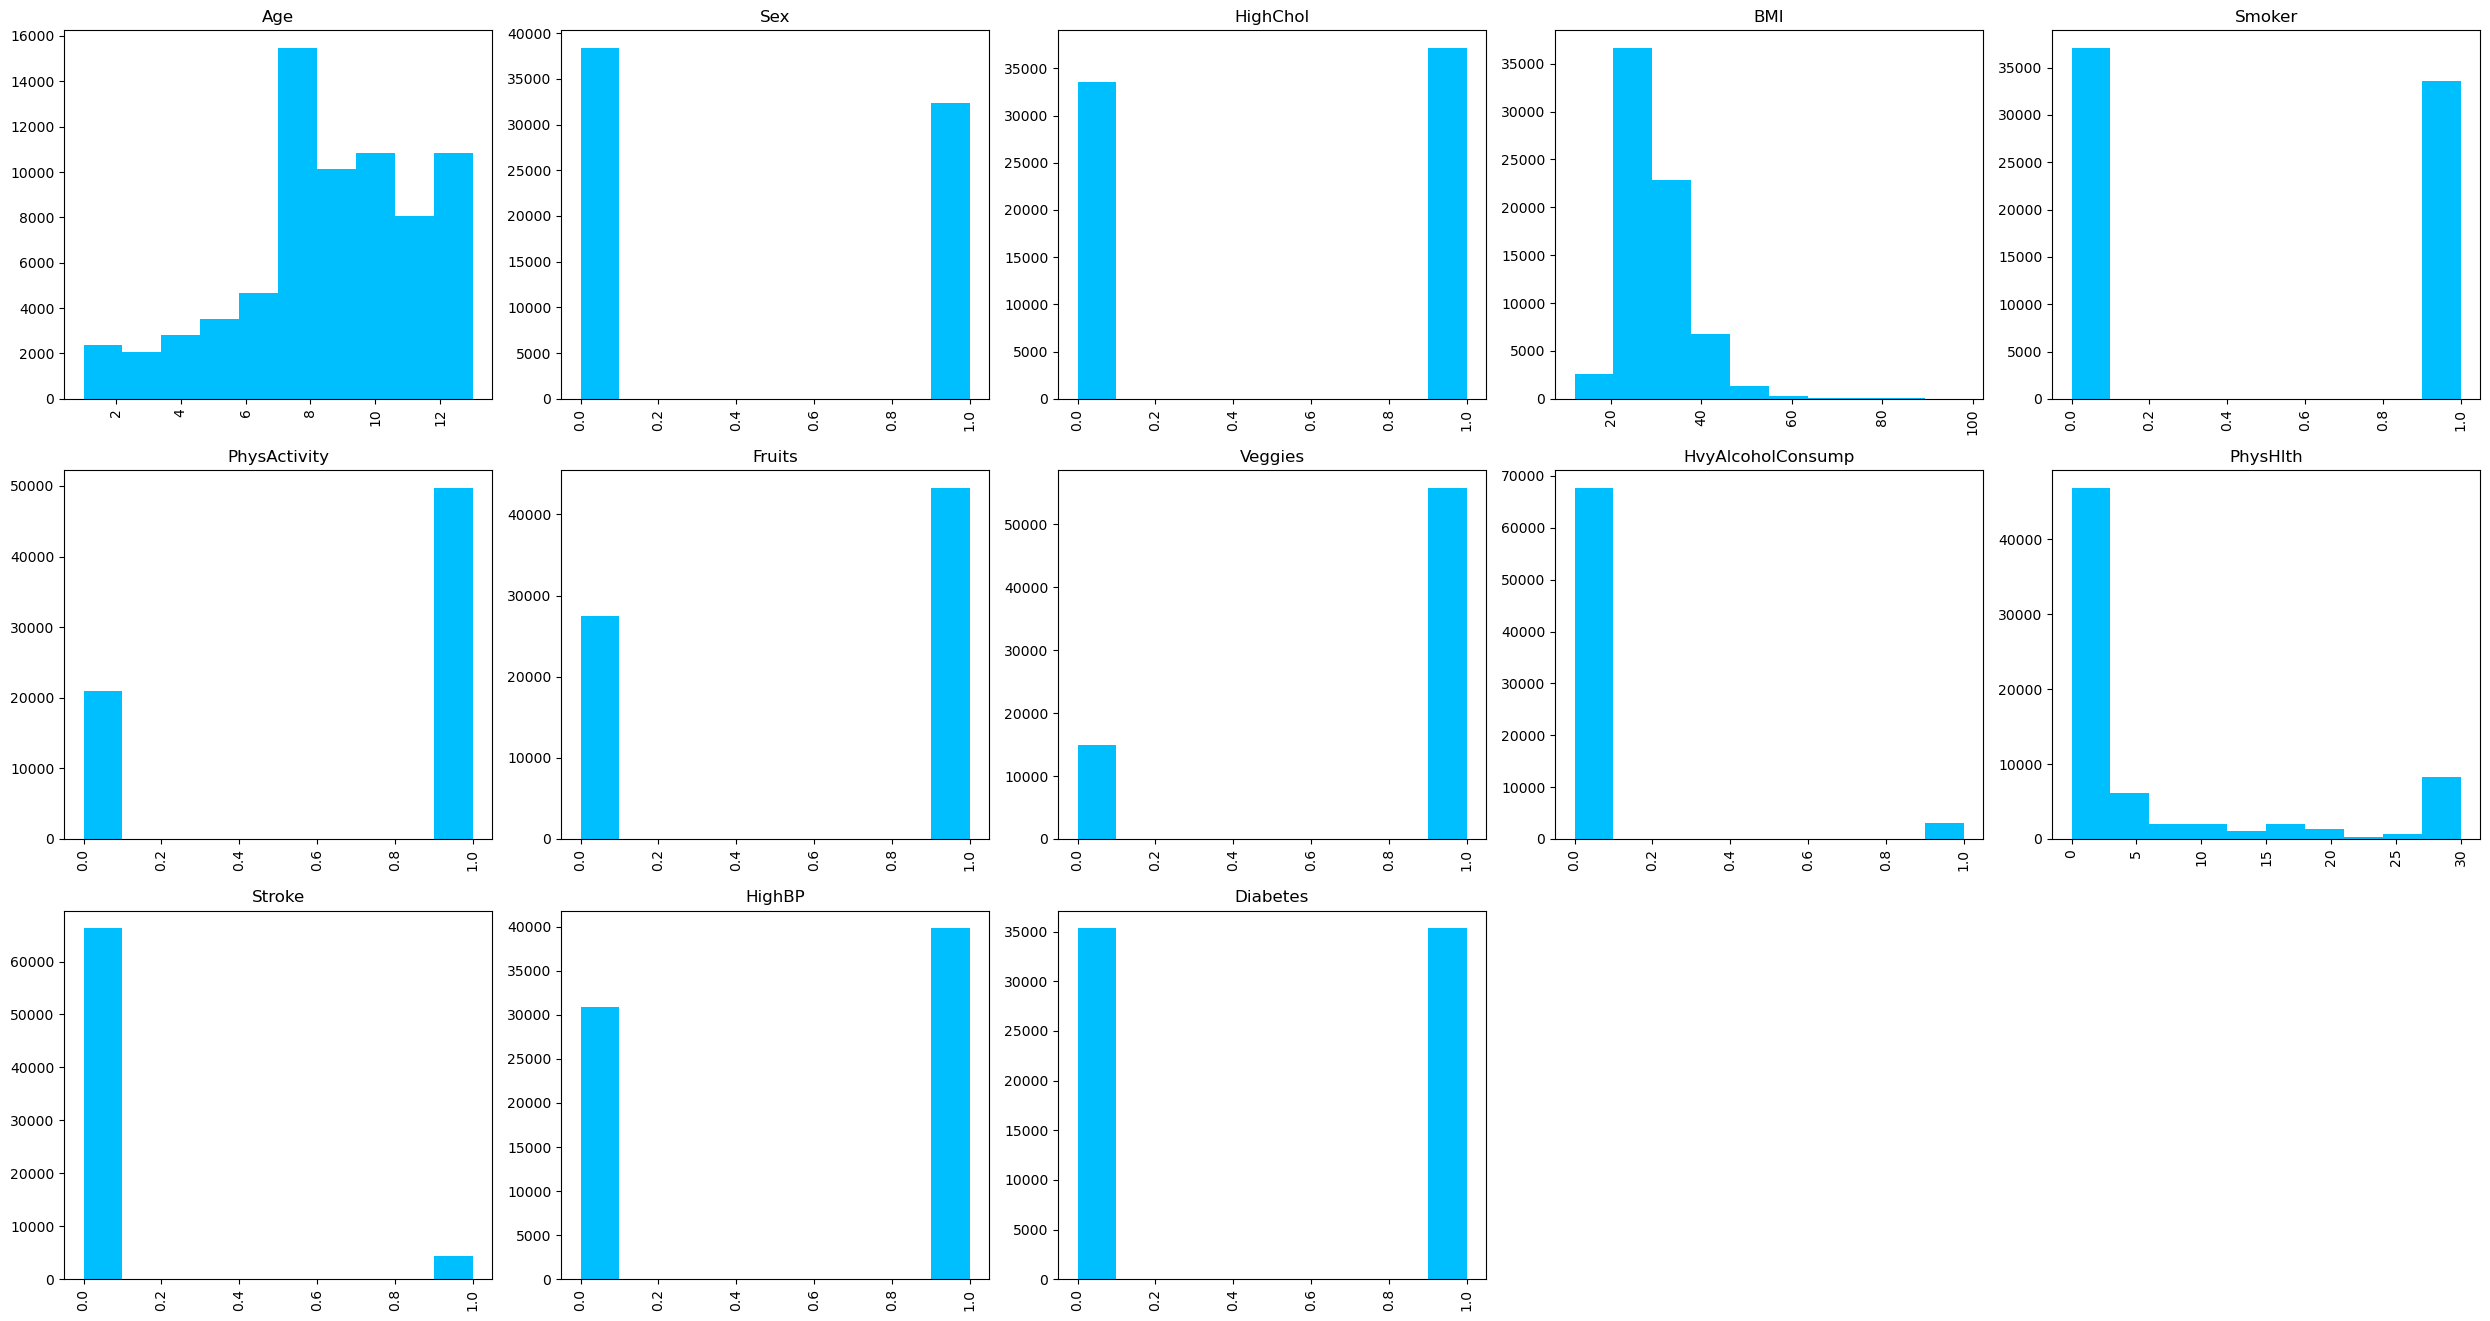

In [16]:
# Все столбцы данных, кроме цвета
feature_cols = [x for x in df.columns if x not in 'stroke']
plt.figure(figsize=(25,35))
# Петля для подсюжетов
for i in range(len(feature_cols)):
    plt.subplot(8,5,i+1)
    plt.title(feature_cols[i])
    plt.xticks(rotation=90)
    plt.hist(df[feature_cols[i]],color = "deepskyblue")
    
plt.tight_layout()

- На диаграммах мы видим, что у столбца 'HvyAlcoholConsump' и 'Stroke' очень маленькие категории. Их стоит удалить

In [17]:
# удаление столбцов с малым количеством категорий
df = df.drop(['HvyAlcoholConsump', 'Stroke'], axis=1)

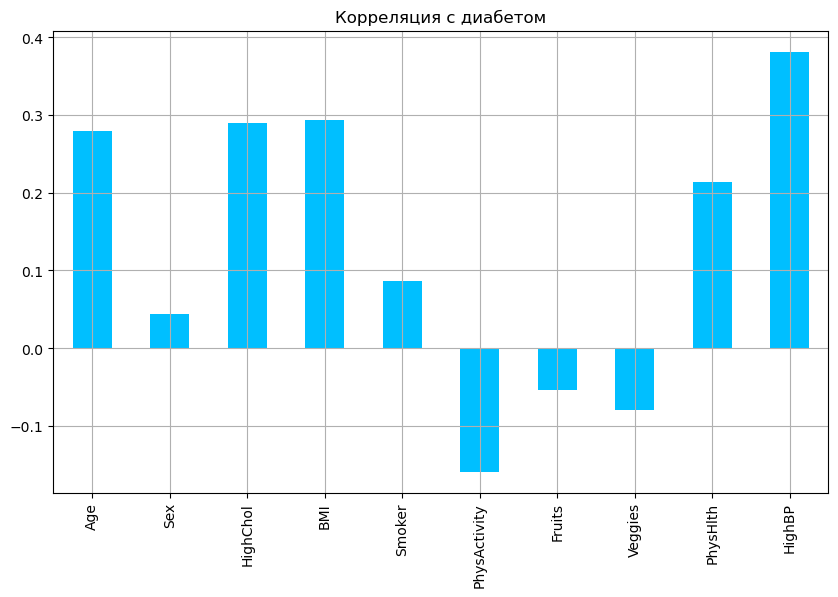

In [18]:
#check correlation of other columns with diabetes column
df.drop('Diabetes', axis=1).corrwith(df.Diabetes).plot(kind='bar',
                                                       grid=True,
                                                       figsize=(10, 6),
                                                       title="Корреляция с диабетом",
                                                       color="deepskyblue");

- Переменные с корреляцией менее 0,1 - это `Sex`, `Smoker`, `Fruits`, `Veggies`

In [19]:
# удалим переменные с низкими коррелляциями Sex, Smoker, Fruits, Veggies
df = df.drop(['Sex','Smoker','Fruits','Veggies'], axis=1)

In [20]:
df[:5]

,Age,HighChol,BMI,PhysActivity,PhysHlth,HighBP,Diabetes
0,4.0,0.0,26.0,1.0,30.0,1.0,0.0
1,12.0,1.0,26.0,0.0,0.0,1.0,0.0
2,13.0,0.0,26.0,1.0,10.0,0.0,0.0
3,11.0,1.0,28.0,1.0,3.0,1.0,0.0
4,8.0,0.0,29.0,1.0,0.0,0.0,0.0


## 4. Построение моделей

In [21]:
#Check skewness
#can only be checked for numeric data

#df_skew = df[['Age','BMI','PhysHlth']]
#skew = pd.DataFrame(df_skew.skew())
#skew.columns = ['skew']
#skew['too_skewed'] = skew['skew'] > .75
#skew

In [22]:
#Scaling the data for features selection using the MinMaxScaler method.
#only numeric variables apply here

#mms = MinMaxScaler()
#df[['BMI']] = mms.fit_transform(df[['BMI']])
#df[['Age']] = mms.fit_transform(df[['Age']])
#df[['PhysHlth']] = mms.fit_transform(df[['PhysHlth']])
#df.head()

In [23]:
#Features selection -step 1
#1. Define X,y
y = (df['Diabetes']).astype(int)
X = df.drop(['Diabetes'], axis=1)  # everything except "Diabetes"

In [24]:
df[:5]

,Age,HighChol,BMI,PhysActivity,PhysHlth,HighBP,Diabetes
0,4.0,0.0,26.0,1.0,30.0,1.0,0.0
1,12.0,1.0,26.0,0.0,0.0,1.0,0.0
2,13.0,0.0,26.0,1.0,10.0,0.0,0.0
3,11.0,1.0,28.0,1.0,3.0,1.0,0.0
4,8.0,0.0,29.0,1.0,0.0,0.0,0.0


[0.15019675 0.10736566 0.34066919 0.02293612 0.1428706  0.23596168]


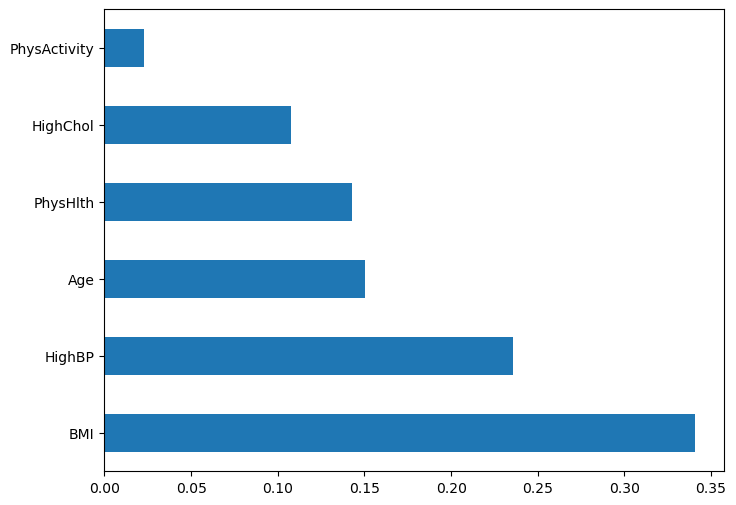

In [25]:
#step 2

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(8,6))
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [26]:
#method 2   

#apply SelectKBest class to extract top 5 best features   #Do this before quantile transformation
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(6,'Score'))  #print 5 best features

          Specs         Score
4      PhysHlth  55929.053254
2           BMI  10312.875795
0           Age   5204.869946
5        HighBP   4491.799960
1      HighChol   2804.501278
3  PhysActivity    528.494034


In [27]:
#Method 3

#Create a logistic regression classifier
lr = LogisticRegression()
# Create an EFS object
efs = EFS(estimator=lr,        # Use logistic regression as the classifier/estimator
          min_features=1,      # The minimum number of features to consider is 1
          max_features=5,      # The maximum number of features to consider is 5
          scoring='accuracy',  # The metric to use to evaluate the classifier is accuracy 
          cv=4)                # The number of cross-validations to perform is 4

# Train EFS with our dataset
efs = efs.fit(X, y)
# Print the results
print('Best accuracy score: %.2f' % efs.best_score_) # best_score_ shows the best score 
print('Best subset (indices):', efs.best_idx_)       # best_idx_ shows the index of features that yield the best score 
print('Best subset (corresponding names):', efs.best_feature_names_) # best_feature_names_ shows the feature names 

Features: 62/62

Best accuracy score: 0.72
Best subset (indices): (0, 1, 2, 4, 5)
Best subset (corresponding names): ('Age', 'HighChol', 'BMI', 'PhysHlth', 'HighBP')


In [28]:
#recheck the skew
#df_skew = df[['Age','BMI','PhysHlth']]
#skew = pd.DataFrame(df_skew.skew())
#skew.columns = ['skew']
#skew['too_skewed'] = skew['skew'] > .75
#skew

In [29]:
#qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
#df[['BMI']] = qt.fit_transform(df[['BMI']])
#df[['PhysHlth']] = qt.fit_transform(df[['PhysHlth']])

In [30]:
#recheck the skew
#df_skew = df[['Age','BMI','PhysHlth']]
#skew = pd.DataFrame(df_skew.skew())
#skew.columns = ['skew']
#skew['too_skewed'] = skew['skew'] > .75
#skew

### Model building and testing

In [31]:
#Data splitting

y = (df['Diabetes']).astype(int)
#X = df.loc[:, df.columns != 'stroke']  # everything except "stroke"
X = df.drop(['Diabetes'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
X_train.shape

(49484, 6)

In [33]:
X_test.shape

(21208, 6)

### K Nearest Neighbors

In [34]:
df[:5]

,Age,HighChol,BMI,PhysActivity,PhysHlth,HighBP,Diabetes
0,4.0,0.0,26.0,1.0,30.0,1.0,0.0
1,12.0,1.0,26.0,0.0,0.0,1.0,0.0
2,13.0,0.0,26.0,1.0,10.0,0.0,0.0
3,11.0,1.0,28.0,1.0,3.0,1.0,0.0
4,8.0,0.0,29.0,1.0,0.0,0.0,0.0


In [35]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17,19],  #odd numbers because there are 2 classes in target coulmn
              'weights': ['distance', 'uniform']}  
gridKNN = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
gridKNN.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.643 total time=   0.1s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.645 total time=   0.1s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.639 total time=   0.1s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.644 total time=   0.1s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.637 total time=   0.1s
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.643 total time=   0.2s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.645 total time=   0.2s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.639 total time=   0.2s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.644 total time=   0.2s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.637 total time=   0.2s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.664 total time=   0.1s
[CV 2/5] END ...n_neighbors=3, weights=distance

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['distance', 'uniform']},
             verbose=3)

In [36]:
print(gridKNN.best_params_)

{'n_neighbors': 19, 'weights': 'uniform'}


In [37]:
#predict with the best parameter
y_pred_test = gridKNN.predict(X_test)
y_pred_train = gridKNN.predict(X_train)

In [38]:
#Check accuracy and overfitting
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.7325398108479508
0.7121840814786873


<Figure size 500x500 with 0 Axes>

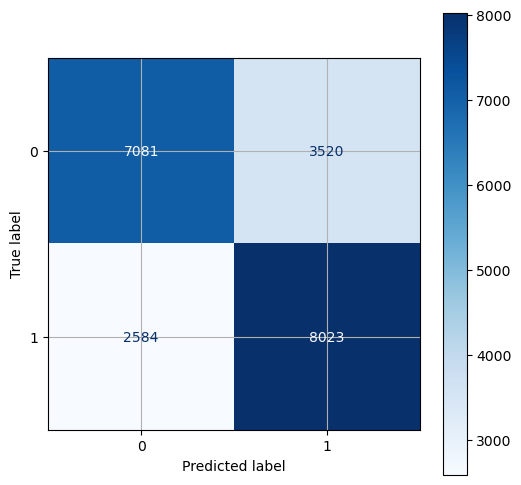

In [39]:
#confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test, labels=gridKNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gridKNN.classes_)
fig = plt.figure(figsize=(5, 5))
disp.plot(cmap=plt.cm.Blues) 
plt.grid(which='major')     #remove cell gridlines
plt.gcf().set_size_inches(6, 6)   # Adjust the size of the plot
plt.show()

In [40]:
#model metrics

#function that get y_test and calculate into df all the relevant metric
def train_evaluate_model(y_test):
    #fit the model instance 
    predictions = y_pred_test # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    auc = roc_auc_score(y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy, auc]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy', 'auc'])
    return eval_df

In [41]:
#model metrics

results = train_evaluate_model(y_test)
results.index = ['K Nearest Neighbors - Method 1']
results.style.background_gradient(cmap = sns.color_palette("blend:green,red", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.712184,0.724424,0.695053,0.756387,0.712172,0.712172


### Decision Tree

In [42]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

In [43]:
X_train.shape

(49484, 6)

In [44]:
#dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

# defining parameter range
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}  
gridDT = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, n_jobs=-1)
  
# fitting the model for grid search
gridDT.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 26, 2),
                         'max_features': range(1, 7)})

In [45]:
print(gridDT.best_params_)

{'max_depth': 7, 'max_features': 4}


In [46]:
y_pred_test = gridDT.predict(X_test)
y_pred_train = gridDT.predict(X_train)

In [47]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.7280333036941233
0.7178423236514523


<Figure size 500x500 with 0 Axes>

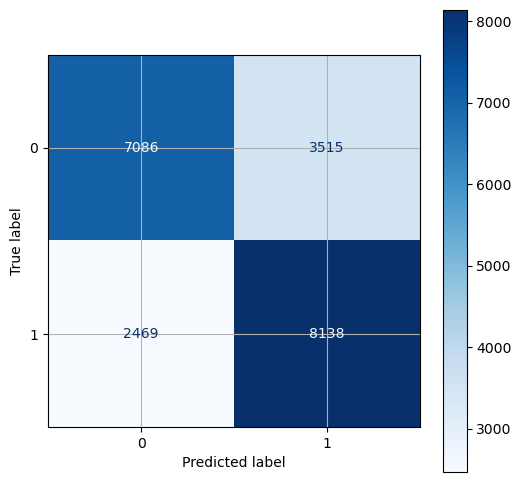

In [48]:
#confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test, labels=gridDT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gridDT.classes_)
fig = plt.figure(figsize=(5, 5))
disp.plot(cmap=plt.cm.Blues) 
plt.grid(which='major')     #remove cell gridlines
plt.gcf().set_size_inches(6, 6)   # Adjust the size of the plot
plt.show()

In [49]:
resultsDT = train_evaluate_model(y_test)
resultsDT.index = ['Decision Trees - Method 2']
results = results.append(resultsDT)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.712184,0.724424,0.695053,0.756387,0.712172,0.712172
Decision Trees - Method 2,0.717842,0.731177,0.698361,0.767229,0.717828,0.717828


### Random Forest

In [50]:
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

# defining parameter range
param_grid = {'n_estimators':[15, 20, 30, 40, 50, 100, 150, 200, 300, 400]
              }  
gridRF = GridSearchCV(RF, param_grid)
  
# fitting the model for grid search
gridRF.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42,
                                              warm_start=True),
             param_grid={'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200,
                                          300, 400]})

In [51]:
print(gridRF.best_params_)

{'n_estimators': 400}


In [52]:
y_pred_test = gridRF.predict(X_test)
y_pred_train = gridRF.predict(X_train)

In [53]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.8024411931129254
0.6940777065258393


<Figure size 500x500 with 0 Axes>

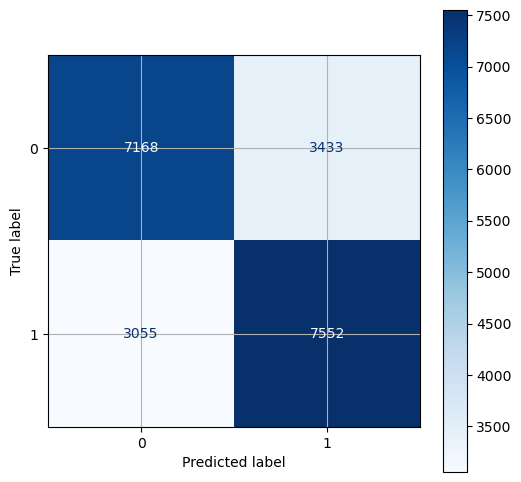

In [54]:
#confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test, labels=gridRF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gridRF.classes_)
fig = plt.figure(figsize=(5, 5))
disp.plot(cmap=plt.cm.Blues) 
plt.grid(which='major')     #remove cell gridlines
plt.gcf().set_size_inches(6, 6)   # Adjust the size of the plot
plt.show()

### Final result table

In [55]:
resultsRF = train_evaluate_model(y_test)
resultsRF.index = ['Random Forest - Method 3']
results = results.append(resultsRF)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.712184,0.724424,0.695053,0.756387,0.712172,0.712172
Decision Trees - Method 2,0.717842,0.731177,0.698361,0.767229,0.717828,0.717828
Random Forest - Method 3,0.694078,0.699518,0.687483,0.711983,0.694073,0.694073


## 5. Оценка и оптимизация моделей

## 6. Сохранение модели в файл

In [56]:
df[:5]

,Age,HighChol,BMI,PhysActivity,PhysHlth,HighBP,Diabetes
0,4.0,0.0,26.0,1.0,30.0,1.0,0.0
1,12.0,1.0,26.0,0.0,0.0,1.0,0.0
2,13.0,0.0,26.0,1.0,10.0,0.0,0.0
3,11.0,1.0,28.0,1.0,3.0,1.0,0.0
4,8.0,0.0,29.0,1.0,0.0,0.0,0.0


In [57]:
import joblib
joblib.dump(gridKNN, 'diabet_model_pred.joblib')

['diabet_model_pred.joblib']

In [68]:
import joblib

# Загружаем модель из файла
clf = joblib.load('diabet_model_pred.joblib')

# Используем модель для предсказаний
X_new = [[1, 0, 55.8, 1, 1, 19]]
y_pred = clf.predict(X_new)
if y_pred == 0:
    print('Диагноз не подтвержден😎')
if y_pred == 1:
    print('У вас сахарный диабет🥺')

У вас сахарный диабет🥺
